In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
G = 6.674E-11
DT = 0.001
STEP = 100
SCALE = 1.0E-8
MASS_EARTH = 5.972E24
SPEED_EARTH = 29722.222
MASS_MOON = 7.35E22
SPEED_MOON = 2.9E4
MASS_SUN = 1.9891E30

In [3]:
class Body:
    def __init__(self, mass, position = np.zeros(3), momentum = np.zeros(3)):
        self.position = position
        self.momentum = momentum
        self.mass = mass
        
    def update_momentum(self, bodies):
        for body in bodies:
            netforce = np.zeros(3)
            if not body is self:
                direction = self.position - body.position
                netforce = netforce - (G*body.mass*self.mass/np.linalg.norm(direction)*direction) / abs(direction.dot(direction))
            self.momentum = self.momentum + netforce * DT
    
    def update(self):
        self.position = self.position + (self.momentum * DT) / self.mass

<IPython.core.display.Javascript object>


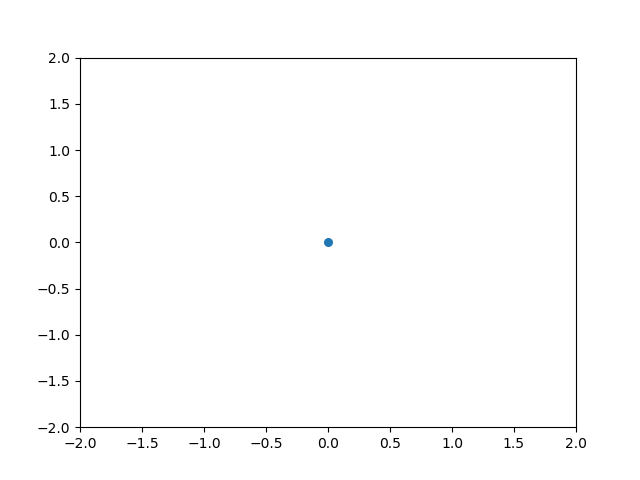

In [5]:
Bodies = [Body(position=np.array([0,0,0]), momentum=np.array([0,-MASS_EARTH*SPEED_EARTH-MASS_MOON*SPEED_MOON,0]), mass=MASS_SUN), 
          Body(position=np.array([149.6E6,0,0]), momentum=np.array([0,MASS_EARTH*SPEED_EARTH,0]), mass=MASS_EARTH), 
          Body(position=np.array([384.4E3+149.6E6,0,0]), momentum=np.array([0,MASS_MOON*SPEED_MOON,0]), mass=MASS_MOON)]
fig, ax = plt.subplots()
ax.set(xlim=(-2, 2), ylim=(-2, 2))
scat = plt.scatter([], [], s=30)

def update(frame):
    X, Y= [], []
    P = []
    
    for _ in range(STEP):
        for body in Bodies:
            body.update_momentum(Bodies)
        
        for body in Bodies:
            body.update()

    for body in Bodies:
        scale = body.position*SCALE
        P.append(scale.tolist()[:2])
        
    scat.set_offsets(tuple(P))
    
    return scat,

ani = FuncAnimation(fig, update, frames=100000, blit=True, interval=1)
plt.show()